In [29]:
import numpy as np
import matplotlib.pyplot as plt

## QR Decomposition

In [30]:
np.random.seed(0)
A = np.random.randint(1, 50, size = (3, 3))

m, n = A.shape
Q = np.zeros((m, n))
R = np.zeros((n, n))

c1 = A[:, 0]
R[0, 0] = np.linalg.norm(c1)
Q[:, 0] = c1 / R[0, 0]

c2 = A[:, 1]
R[0, 1] = np.dot(Q[:, 0], c2)
c2 = c2 - R[0, 1] * Q[:, 0]  
R[1, 1] = np.linalg.norm(c2)
Q[:, 1] = c2 / R[1, 1]

c3 = A[:, 2]
R[0, 2] = np.dot(Q[:, 0], c3)  
c3 = c3 - R[0, 2] * Q[:, 0]   
R[1, 2] = np.dot(Q[:, 1], c3) 
c3 = c3 - R[1, 2] * Q[:, 1]    
R[2, 2] = np.linalg.norm(c3)
Q[:, 2] = c3 / R[2, 2]

A_re = np.dot(Q, R)
ortho_check  = np.allclose(np.dot(Q.T, Q), np.eye(n)) 

print("Matrix A:")
print(A)
print("\nOrthogonal Matrix Q: ")
print(Q)
print("\nUpper Triangular Matrix R:")
print(R)
print("\nReconstructed Matrix A: ")
print(A_re)

if ortho_check == True:
    print("\nQ is orthogonal")
else:
    print("\nQ is not orthogonal")

Matrix A:
[[45 48  1]
 [ 4  4 40]
 [10 20 22]]

Orthogonal Matrix Q: 
[[ 0.97253263 -0.21260007 -0.09477077]
 [ 0.08644734 -0.048132    0.99509304]
 [ 0.21611836  0.97595313  0.02843123]]

Upper Triangular Matrix R:
[[46.27094121 51.3497227   9.18503037]
 [ 0.          9.12173111 19.33308881]
 [ 0.          0.         40.33443807]]

Reconstructed Matrix A: 
[[45. 48.  1.]
 [ 4.  4. 40.]
 [10. 20. 22.]]

Q is orthogonal


## Least-squares Problems

In [31]:
A = np.array([[1, 1],
               [1, 2],
               [1, 3]])
b = np.array([1, 2, 2])

A_T_a = A.T @ A
A_T_b = A.T @ b
x = np.linalg.inv(A_T_a) @ A_T_b

print("Matrix A:")
print(A)
print("\nVector b:")
print(b)
print("\nSolution x:")
print(x)

Matrix A:
[[1 1]
 [1 2]
 [1 3]]

Vector b:
[1 2 2]

Solution x:
[0.66666667 0.5       ]


## Linear Regressoin

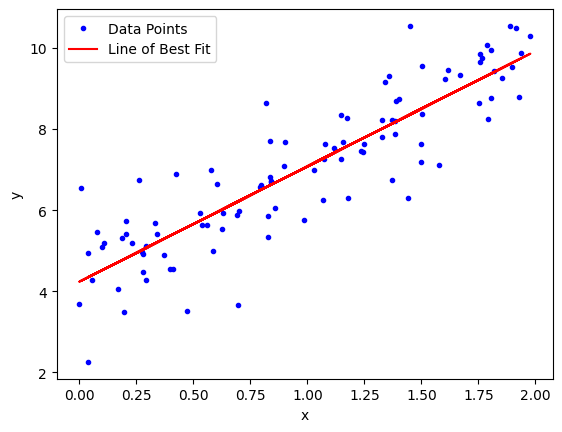

In [32]:
np.random.seed(1)
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100, 1)

x_bias = np.c_[np.ones((100, 1)), x]

#(x^T x)^-1 x^T y
x_T_X = x_bias.T @ x_bias
x_T_y = x_bias.T @ y

best_theta = np.linalg.inv(x_T_X) @ x_T_y

plt.plot(x, y, "b. ", label = "Data Points")
plt.plot(x, x_bias @ best_theta, "r-", label = "Line of Best Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()